Throughout this lesson, you've been trying different models on the same two datasets, wine and diabetes. Now, we're going to try our hand at accelerating this methodology by using AutoGluon. In this exercise, train two different AutonGluon models and see how they compare to previous iterations in exercise 1 and 2.

You're tasked with completing the following steps:
1. Load in the wine dataset from scikit learn.
2. For the wine dataset, create a train and test split, 80% train / 20% test.
3. Create a AutoGluon Classifier model with these hyper parameters:
    1. time_limit: 120
    2. presets: best_quality
4. Output the model table summary
5. Evaluate the trained model on the test dataset
6. Load the diabetes dataset from scikit learn
7. For the Diabetes dataset, create a train and test split, 80% train / 20% test.
8. Create a AutoGluon Regression model with these hyper parameters:
    1. eval_metric: r2
    2. time_limit: 120
    3. presets: best_quality
9. Output the model table summary
10. Evaluate the trained model on the test dataset

## Setup

### Open up Sagemaker Studio

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

     |████████████████████████████████| 2.1 MB 22.5 MB/s            
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 1.0 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.3.0
    Uninstalling setuptools-59.3.0:
      Successfully uninstalled setuptools-59.3.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 31.8 MB/s eta 0:00:0000:0100:01m
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080019 sha256=0f8d06044871a9697471ff9833b2c8500f4adc8e91cb16e5caa5a3615eec3b58
  Stored in directory: /root/.cache/pip/wheels/9f/9e/ac/f24f30e119df735

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor
%matplotlib inline

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## AutoGluon Classifier

In [4]:
# Load in the wine dataset
wine = datasets.load_wine()

In [5]:
# Create the wine `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(wine["data"], columns=wine["feature_names"])

# Include the target as well
df['target'] = wine["target"]

In [6]:
# Split your data with these ratios: train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

In [7]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a classifier, autogluon will pick it up
predictor = TabularPredictor(label="target").fit(
            train_data=df_train, time_limit=120, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230520_043738/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=5, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20230520_043738/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Mar 23 09:54:12 UTC 2023
Train Data Rows:    142
Train Data Columns: 13
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [2, 1, 0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 3
Using Feature Gen

In [8]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   1.000000       0.067589  24.346765                0.000466           0.402984            2       True         14
1         LightGBMXT_BAG_L1   0.985915       0.013828  10.043832                0.013828          10.043832            1       True          4
2      LightGBMLarge_BAG_L1   0.985915       0.018003  11.417154                0.018003          11.417154            1       True         13
3     NeuralNetTorch_BAG_L1   0.985915       0.049120  12.526627                0.049120          12.526627            1       True         12
4    NeuralNetFastAI_BAG_L1   0.985915       0.102481  20.218762                0.102481          20.218762            1       True          3
5   RandomForestEntr_BAG_L1   0.985915       0.105538   0.738935                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6619718309859155,
  'KNeighborsDist_BAG_L1': 0.7112676056338029,
  'NeuralNetFastAI_BAG_L1': 0.9859154929577465,
  'LightGBMXT_BAG_L1': 0.985915492957746

<AxesSubplot:xlabel='model'>

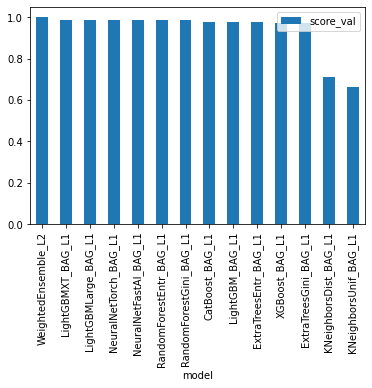

In [9]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [10]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(df_test)

Evaluation: accuracy on test data: 0.9722222222222222
Evaluations on test data:
{
    "accuracy": 0.9722222222222222,
    "balanced_accuracy": 0.9791666666666666,
    "mcc": 0.9572184238576891
}


## AutoGluon Regression

In [11]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [12]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])

# Include the target as well
dfd['target'] = diabetes["target"]

In [13]:
# Split your data with these ratios: train: 0.8 | test: 0.2
dfd_train, dfd_test = train_test_split(dfd, test_size=0.2, random_state=0)

In [14]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a regression, autogluon will pick it up
predictor = TabularPredictor(
            label="target", problem_type="regression", eval_metric="r2"
).fit(
    train_data=dfd_train,
    time_limit=120,
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230520_043949/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=5, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20230520_043949/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Mar 23 09:54:12 UTC 2023
Train Data Rows:    353
Train Data Columns: 10
Label Column: target
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2654.19 MB
	Train Data (Original)  Memory Usage: 0.03 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note:

In [15]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.554562       0.194068  56.594741                0.000883           0.492660            2       True         12
1        LightGBMXT_BAG_L1   0.541581       0.021540  11.247531                0.021540          11.247531            1       True          3
2    NeuralNetTorch_BAG_L1   0.527235       0.045410  15.253072                0.045410          15.253072            1       True         10
3          CatBoost_BAG_L1   0.522807       0.007339  11.297976                0.007339          11.297976            1       True          6
4          LightGBM_BAG_L1   0.514039       0.016653  10.785083                0.016653          10.785083            1       True          4
5     ExtraTreesMSE_BAG_L1   0.496684       0.108422   0.630654                0.10842

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.43052099899418794,
  'KNeighborsDist_BAG_L1': 0.43970122394744415,
  'LightGBMXT_BAG_L1': 0.5415805668677733,
  'LightGBM_BAG_L1': 0.5140394842930078,
  'RandomForestMSE_BAG_L1': 0.4706085411454686,
  'CatBoost_BAG_L1': 0.5228072001429453,
  'ExtraTreesMSE_BAG_L1':

<AxesSubplot:xlabel='model'>

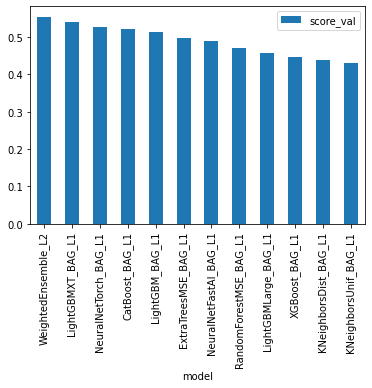

In [16]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [17]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(dfd_test)

Evaluation: r2 on test data: 0.3102745290995317
Evaluations on test data:
{
    "r2": 0.3102745290995317,
    "root_mean_squared_error": -59.47152163100277,
    "mean_squared_error": -3536.861885106831,
    "mean_absolute_error": -44.6815847332558,
    "pearsonr": 0.5838243272676166,
    "median_absolute_error": -32.883026123046875
}
